# Geographic Data Science with Python - Report 3

---

## Section 1: Summary of Readings

This chapter introduces the three foundational spatial data structures used in geographic data science and how they are represented and manipulated in Python. These structures are:

1. **Geographic Tables (Vector Data)** – Rows represent spatial features (e.g., cities, parks), and one column contains geometric shapes like points, lines, or polygons. These are handled using `GeoDataFrame` from the GeoPandas library.

2. **Surfaces (Raster Data)** – Represent continuous phenomena (like elevation or temperature) as grids of cells. Each cell holds a value corresponding to a location. These are managed with `xarray` and `rioxarray`.

3. **Spatial Graphs (Networks)** – Model relationships and connectivity (e.g., roads or adjacency between areas). Represented using spatial weights matrices or graphs from libraries like `networkx` and `PySAL`.

The chapter emphasizes how each data structure captures a different aspect of geographic phenomena and explains how Python tools allow analysis and transformation between these formats. This foundation is critical for performing real-world spatial analysis and making informed decisions based on geographic data.


## Section 2: Working With Python
### 1. Geographic Tables with GeoPandas

In [163]:
import pandas
import osmnx
import geopandas
import rioxarray
import xarray
import datashader
import contextily as cx
from shapely import geometry
import matplotlib.pyplot as plt

In [164]:
gt_polygons = geopandas.read_file(
    r"C:\Users\riley\Desktop\book\data\countries\countries_clean.gpkg"
)
gt_polygons.head()

,ADMIN,geometry
0,Indonesia,"MULTIPOLYGON (((13102705.696 463877.598, 13102..."
1,Malaysia,"MULTIPOLYGON (((13102705.696 463877.598, 13101..."
2,Chile,"MULTIPOLYGON (((-7737827.685 -1979875.5, -7737..."
3,Bolivia,"POLYGON ((-7737827.685 -1979875.5, -7737828.21..."
4,Peru,"MULTIPOLYGON (((-7737827.685 -1979875.5, -7752..."


In [165]:
type(gt_polygons.geometry[0])

shapely.geometry.multipolygon.MultiPolygon

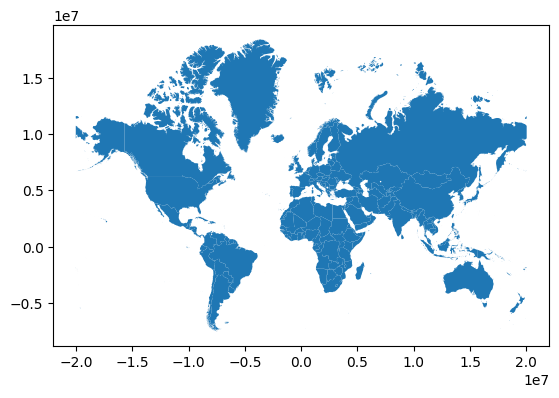

In [166]:
gt_polygons.plot();

In [167]:
gt_polygons["centroid"] = gt_polygons.geometry.centroid
gt_polygons.head()

,ADMIN,geometry,centroid
0,Indonesia,"MULTIPOLYGON (((13102705.696 463877.598, 13102...",POINT (13055431.81 -248921.141)
1,Malaysia,"MULTIPOLYGON (((13102705.696 463877.598, 13101...",POINT (12211696.493 422897.505)
2,Chile,"MULTIPOLYGON (((-7737827.685 -1979875.5, -7737...",POINT (-7959811.948 -4915458.802)
3,Bolivia,"POLYGON ((-7737827.685 -1979875.5, -7737828.21...",POINT (-7200010.945 -1894653.148)
4,Peru,"MULTIPOLYGON (((-7737827.685 -1979875.5, -7752...",POINT (-8277554.831 -1032942.536)


<Axes: >

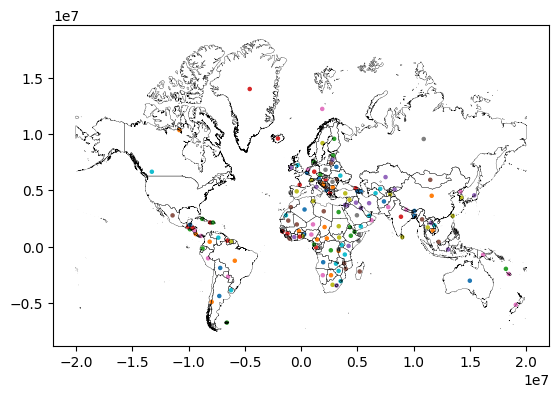

In [168]:
# Plot centroids
ax = gt_polygons.set_geometry("centroid").plot("ADMIN", markersize=5)
# Plot polygons without color filling
gt_polygons.plot(
    "ADMIN", ax=ax, facecolor="none", edgecolor="k", linewidth=0.2
)

In [169]:
gt_polygons.query('ADMIN == "Bolivia"')

,ADMIN,geometry,centroid
3,Bolivia,"POLYGON ((-7737827.685 -1979875.5, -7737828.21...",POINT (-7200010.945 -1894653.148)


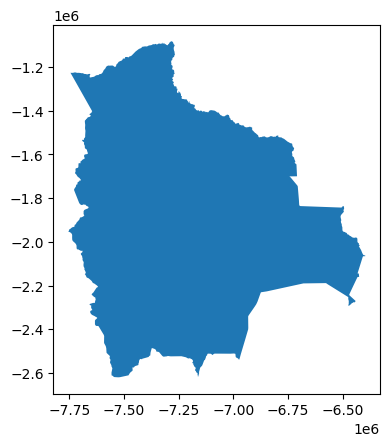

In [170]:
gt_polygons.query('ADMIN == "Bolivia"').plot();

In [171]:
gt_polygons.query('ADMIN == "Indonesia"')

,ADMIN,geometry,centroid
0,Indonesia,"MULTIPOLYGON (((13102705.696 463877.598, 13102...",POINT (13055431.81 -248921.141)


In [172]:
gt_points = geopandas.read_file(
    r"C:\Users\riley\Desktop\book\data\tokyo\tokyo_clean.csv"
)
type(gt_points)

pandas.core.frame.DataFrame

In [173]:
gt_points.head()

,user_id,longitude,latitude,date_taken,photo/video_page_url,x,y
0,10727420@N00,139.700499,35.674,2010-04-09 17:26:25.0,http://www.flickr.com/photos/10727420@N00/4545...,15551388.412246225,4255856.495804089
1,8819274@N04,139.76652099999998,35.709095,2007-02-10 16:08:40.0,http://www.flickr.com/photos/8819274@N04/26503...,15558737.947667373,4260666.768969337
2,62068690@N00,139.765632,35.694482,2008-12-21 15:45:31.0,http://www.flickr.com/photos/62068690@N00/3125...,15558638.984640066,4258663.590523438
3,49503094041@N01,139.784391,35.548589,2011-11-11 05:48:54.0,http://www.flickr.com/photos/49503094041@N01/6...,15560727.226967853,4238684.374246344
4,40443199@N00,139.768753,35.671521000000006,2006-04-06 16:42:49.0,http://www.flickr.com/photos/40443199@N00/2482...,15558986.412770832,4255516.79330149


In [174]:
pt_geoms = geopandas.points_from_xy(
    x=gt_points["longitude"],
    y=gt_points["latitude"],
    # x,y are Earth longitude & latitude
    crs="EPSG:4326",
)
gt_points = geopandas.GeoDataFrame(gt_points, geometry=pt_geoms)
gt_points.head()

,user_id,longitude,latitude,date_taken,photo/video_page_url,x,y,geometry
0,10727420@N00,139.700499,35.674,2010-04-09 17:26:25.0,http://www.flickr.com/photos/10727420@N00/4545...,15551388.412246225,4255856.495804089,POINT (139.7005 35.674)
1,8819274@N04,139.76652099999998,35.709095,2007-02-10 16:08:40.0,http://www.flickr.com/photos/8819274@N04/26503...,15558737.947667373,4260666.768969337,POINT (139.76652 35.7091)
2,62068690@N00,139.765632,35.694482,2008-12-21 15:45:31.0,http://www.flickr.com/photos/62068690@N00/3125...,15558638.984640066,4258663.590523438,POINT (139.76563 35.69448)
3,49503094041@N01,139.784391,35.548589,2011-11-11 05:48:54.0,http://www.flickr.com/photos/49503094041@N01/6...,15560727.226967853,4238684.374246344,POINT (139.78439 35.54859)
4,40443199@N00,139.768753,35.671521000000006,2006-04-06 16:42:49.0,http://www.flickr.com/photos/40443199@N00/2482...,15558986.412770832,4255516.79330149,POINT (139.76875 35.67152)


### 2. Surfaces

In [175]:
pop = rioxarray.open_rasterio(r"C:\Users\riley\Desktop\book\data\ghsl\ghsl_sao_paulo.tif")
type(pop)

xarray.core.dataarray.DataArray

In [176]:
pop.coords

Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 4kB -4.482e+06 -4.482e+06 ... -4.365e+06 -4.365e+06
  * y            (y) float64 3kB -2.822e+06 -2.822e+06 ... -2.926e+06 -2.926e+06
    spatial_ref  int64 8B 0

In [177]:
pop.attrs

{'AREA_OR_POINT': 'Area',
 '_FillValue': np.float32(-200.0),
 'scale_factor': 1.0,
 'add_offset': 0.0}

In [178]:
pop.shape

(1, 416, 468)

In [179]:
pop.sel(band=1)

<xarray.DataArray (y: 416, x: 468)> Size: 779kB
[194688 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 4kB -4.482e+06 -4.482e+06 ... -4.365e+06 -4.365e+06
  * y            (y) float64 3kB -2.822e+06 -2.822e+06 ... -2.926e+06 -2.926e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     -200.0
    scale_factor:   1.0
    add_offset:     0.0

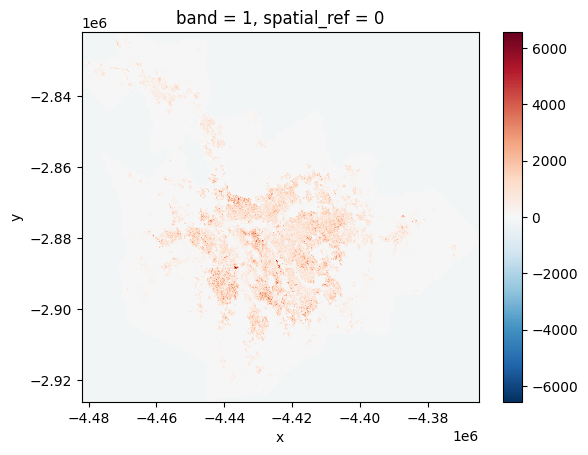

In [180]:
pop.sel(band=1).plot()

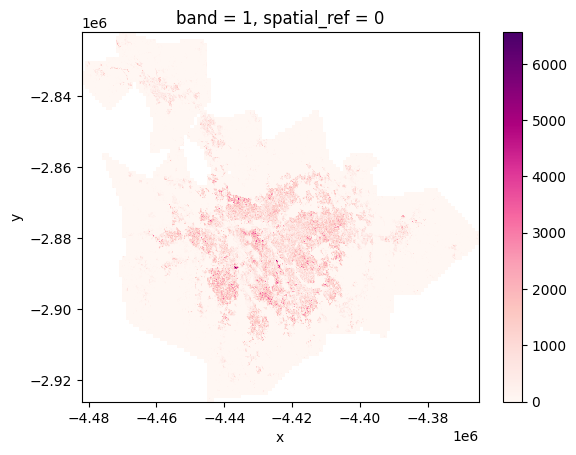

In [181]:
pop.where(pop != -200).sel(band=1).plot(cmap="RdPu")

### 3. Spatial Graphs

In [182]:
graph = osmnx.load_graphml(r"C:\Users\riley\Desktop\book\data\cache\yoyogi_park_graph.graphml")
type(graph)

networkx.classes.multidigraph.MultiDiGraph

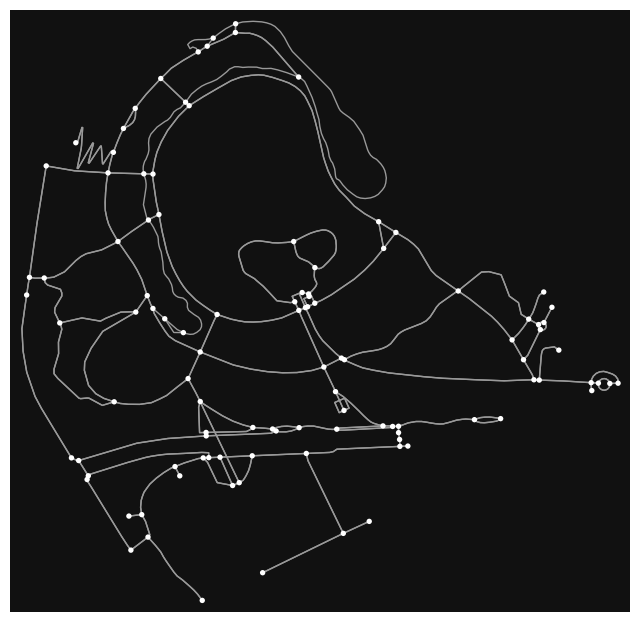

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [183]:
osmnx.plot_graph(graph)

In [184]:
len(graph.nodes)

106

In [185]:
len(graph.edges)

287

In [186]:
graph.nodes[1520546819]

{'y': 35.6711267, 'x': 139.6925951, 'street_count': 4}

In [187]:
graph.edges[(1520546819, 3010293622, 0)]

{'osmid': 138670840,
 'highway': 'footway',
 'oneway': False,
 'length': 59.113,
 'geometry': <LINESTRING (139.693 35.671, 139.693 35.671, 139.693 35.671)>}

In [188]:
list(graph.adj[1520546819].keys())

[3010293622, 5764960322, 1913626649, 1520546959]

### 4. Hybrids

In [189]:
surface = rioxarray.open_rasterio(r"C:\Users\riley\Desktop\book\data\ghsl\ghsl_sao_paulo.tif")
t_surface = surface.to_series()
t_surface.head()

band  y           x         
1     -2822125.0  -4481875.0   -200.0
                  -4481625.0   -200.0
                  -4481375.0   -200.0
                  -4481125.0   -200.0
                  -4480875.0   -200.0
dtype: float32

In [190]:
t_surface = t_surface.reset_index().rename(columns={0: "Value"})
t_surface.query("Value > 1000").info()

<class 'pandas.core.frame.DataFrame'>
Index: 7734 entries, 3785 to 181296
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   band    7734 non-null   int64  
 1   y       7734 non-null   float64
 2   x       7734 non-null   float64
 3   Value   7734 non-null   float32
dtypes: float32(1), float64(2), int64(1)
memory usage: 271.9 KB


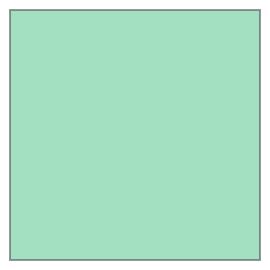

In [191]:
def row2cell(row, res_xy):
    res_x, res_y = res_xy  # Extract resolution for each dimension
    # XY Coordinates are centered on the pixel
    minX = row["x"] - (res_x / 2)
    maxX = row["x"] + (res_x / 2)
    minY = row["y"] + (res_y / 2)
    maxY = row["y"] - (res_y / 2)
    poly = geometry.box(
        minX, minY, maxX, maxY
    )  # Build squared polygon
    return poly
row2cell(t_surface.loc[0, :], surface.rio.resolution())

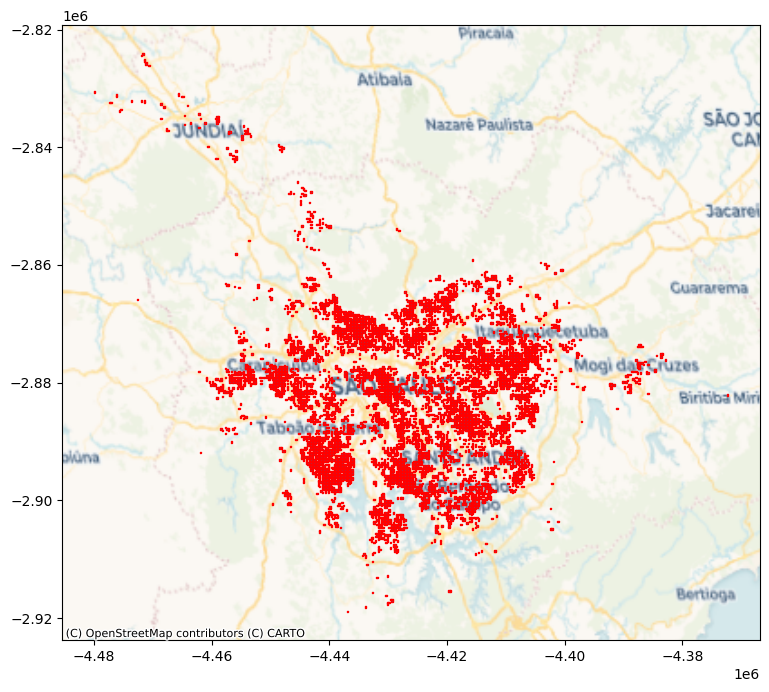

In [192]:
max_polys = (
    t_surface.query(
        "Value > 1000"
    )  # Keep only cells with more than 1k people
    .apply(  # Build polygons for selected cells
        row2cell, res_xy=surface.rio.resolution(), axis=1
    )
    .pipe(  # Pipe result from apply to convert into a GeoSeries
        geopandas.GeoSeries, crs=surface.rio.crs
    )
)

# Plot polygons
ax = max_polys.plot(edgecolor="red", figsize=(9, 9))
# Add basemap
cx.add_basemap(
    ax, crs=surface.rio.crs, source=cx.providers.CartoDB.Voyager
)

In [193]:
new_da = xarray.DataArray.from_series(
    t_surface.set_index(["band", "y", "x"])["Value"]
)
new_da

<xarray.DataArray 'Value' (band: 1, y: 416, x: 468)> Size: 779kB
array([[[-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.],
        ...,
        [-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.]]], dtype=float32)
Coordinates:
  * band     (band) int64 8B 1
  * y        (y) float64 3kB -2.926e+06 -2.926e+06 ... -2.822e+06 -2.822e+06
  * x        (x) float64 4kB -4.482e+06 -4.482e+06 ... -4.365e+06 -4.365e+06

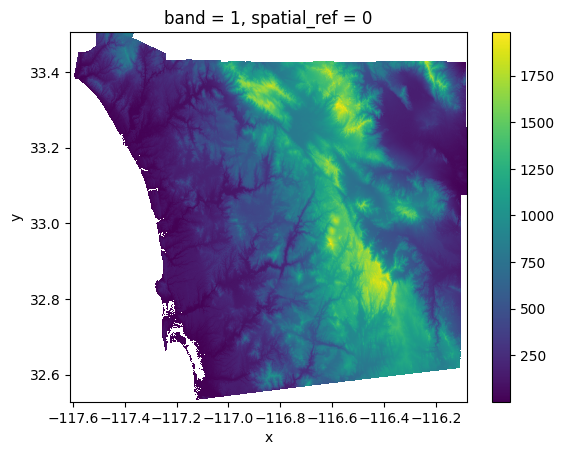

In [194]:
dem = rioxarray.open_rasterio(r"C:\Users\riley\Desktop\book\data\nasadem\nasadem_sd.tif").sel(
    band=1
)
dem.where(dem > 0).plot.imshow()

<Axes: >

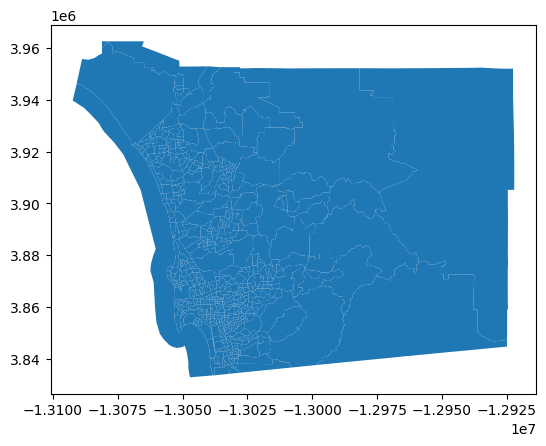

In [195]:
sd_tracts = geopandas.read_file(
    r"C:\Users\riley\Desktop\book\data\sandiego\sandiego_tracts.gpkg"
)
sd_tracts.plot()

In [196]:
largest_tract_id = sd_tracts.query(
    f"area_sqm == {sd_tracts['area_sqm'].max()}"
).index[0]

largest_tract_id

np.int64(627)

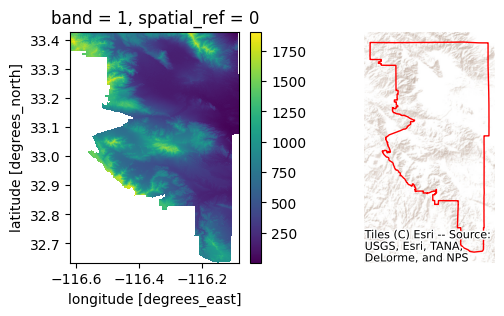

In [197]:
largest_tract = sd_tracts.loc[largest_tract_id, "geometry"]
# Clip elevation for largest tract
dem_clip = dem.rio.clip(
    [largest_tract.__geo_interface__], crs=sd_tracts.crs
)

# Set up figure to display against polygon shape
f, axs = plt.subplots(1, 2, figsize=(6, 3))
# Display elevation of largest tract
dem_clip.where(dem_clip > 0).plot(ax=axs[0], add_colorbar=True)

# Display largest tract polygon
sd_tracts.loc[[largest_tract_id]].plot(
    ax=axs[1], edgecolor="red", facecolor="none"
)
axs[1].set_axis_off()
# Add basemap
cx.add_basemap(
    axs[1], crs=sd_tracts.crs, source=cx.providers.Esri.WorldTerrain
)

In [198]:
dem_clip.where(dem_clip > 0).mean()

<xarray.DataArray ()> Size: 4B
array(585.11346, dtype=float32)
Coordinates:
    band         int64 8B 1
    spatial_ref  int64 8B 0

In [199]:
def get_mean_elevation(row, dem):
    # Extract geometry object
    geom = row["geometry"].__geo_interface__
    # Clip the surface to extract pixels within `geom`
    section = dem.rio.clip([geom], crs=sd_tracts.crs)
    # Calculate mean elevation
    elevation = float(section.where(section > 0).mean())
    return elevation

In [200]:
get_mean_elevation(sd_tracts.loc[largest_tract_id, :], dem)

585.1134643554688

In [201]:
elevations = sd_tracts.head().apply(
    get_mean_elevation, dem=dem, axis=1
)
elevations

0      7.144268
1     35.648491
2     53.711388
3     91.358780
4    187.312027
dtype: float64

In [202]:
from rasterstats import zonal_stats

elevations2 = zonal_stats(
    sd_tracts.to_crs(dem.rio.crs),  # Geotable with zones
    r"C:\Users\riley\Desktop\book\data\nasadem\nasadem_sd.tif",  # Path to surface file
)
elevations2 = pandas.DataFrame(elevations2)

In [203]:
elevations2.head()

,min,max,mean,count
0,-12.0,18.0,3.538397,3594
1,-2.0,94.0,35.616395,5709
2,-5.0,121.0,48.742630,10922
3,31.0,149.0,91.358777,4415
4,-32.0,965.0,184.284941,701973


<Axes: >

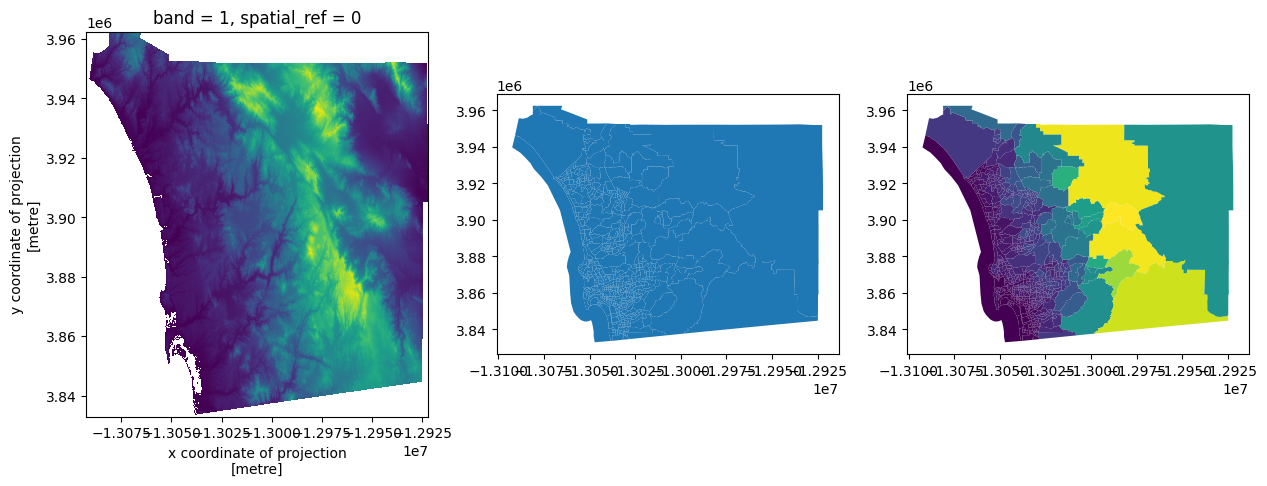

In [204]:
# Set up figure
f, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot elevation surface
dem.where(  # Keep only pixels above sea level
    dem
    > 0
    # Reproject to CRS of tracts
).rio.reproject(
    sd_tracts.crs
    # Render surface
).plot.imshow(
    ax=axs[0], add_colorbar=False
)

# Plot tract geography
sd_tracts.plot(ax=axs[1])

# Plot elevation on tract geography
sd_tracts.assign(  # Append elevation values to tracts
    elevation=elevations2["mean"]
).plot(  # Plot elevation choropleth
    "elevation", ax=axs[2]
)

### 5. Tables as Surfaces

<Axes: >

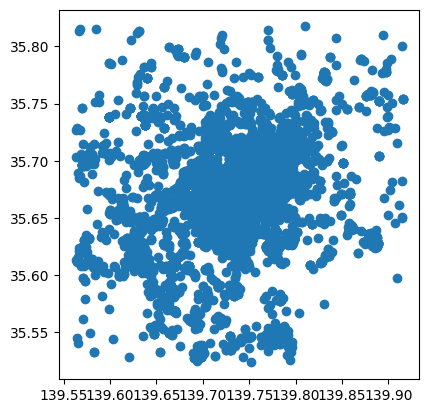

In [205]:
gt_points.plot()

(np.float64(-0.5), np.float64(59.5), np.float64(59.5), np.float64(-0.5))

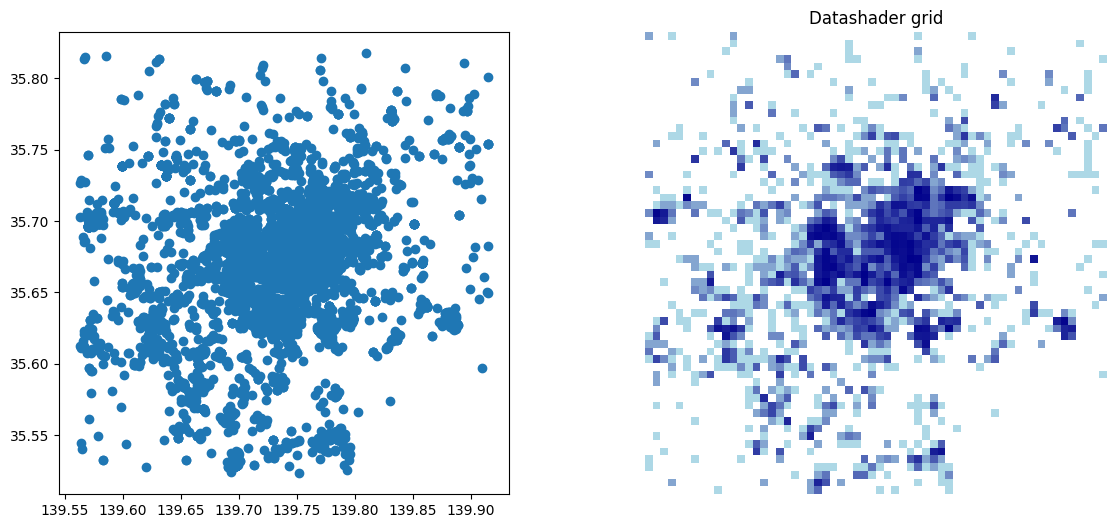

In [206]:
# Ensure longitude and latitude columns are float and drop rows with missing values
gt_points_clean = gt_points.dropna(subset=["longitude", "latitude"]).copy()
gt_points_clean["longitude"] = gt_points_clean["longitude"].astype(float)
gt_points_clean["latitude"] = gt_points_clean["latitude"].astype(float)

cvs = datashader.Canvas(plot_width=60, plot_height=60)
grid = cvs.points(gt_points_clean, x="longitude", y="latitude")

from datashader import transfer_functions as tf

f, axs = plt.subplots(1, 2, figsize=(14, 6))
gt_points_clean.plot(ax=axs[0])
img = tf.shade(grid)
axs[1].imshow(img.to_pil())
axs[1].set_title("Datashader grid")
axs[1].axis("off")

### 6. Networks as Graphs and Tables

In [207]:
gt_intersections, gt_lines = osmnx.graph_to_gdfs(graph)
gt_intersections.head()

,y,x,street_count,highway,geometry
osmid,,,,,
886196069,35.670087,139.694333,3,NaN,POINT (139.69433 35.67009)
886196073,35.669725,139.699508,3,NaN,POINT (139.69951 35.66972)
886196100,35.669442,139.699708,3,NaN,POINT (139.69971 35.66944)
886196106,35.670422,139.698564,4,NaN,POINT (139.69856 35.67042)
886196117,35.671256,139.697470,3,NaN,POINT (139.69747 35.67126)


In [208]:
gt_lines.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 287 entries, (np.int64(886196069), np.int64(1520546857), np.int64(0)) to (np.int64(7684088896), np.int64(3010293702), np.int64(0))
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   osmid     287 non-null    object  
 1   highway   287 non-null    object  
 2   oneway    287 non-null    bool    
 3   length    287 non-null    float64 
 4   geometry  287 non-null    geometry
 5   bridge    8 non-null      object  
 6   name      9 non-null      object  
 7   access    2 non-null      object  
dtypes: bool(1), float64(1), geometry(1), object(5)
memory usage: 26.9+ KB


In [209]:
new_graph = osmnx.graph_from_gdfs(gt_intersections, gt_lines)

## Section 3 - Assignment

Since this chapter was very long and dense I will be answering the questions from the book for this chapter as my assignment.

1. One way to convert from Multi-type geometries into many individual geometries is using the explode() method of a GeoDataFrame. Using the explode() method, can you find out how many islands are in Indonesia?

In [210]:

# Explode the MultiPolygons into individual Polygons (islands)
islands = gt_polygons.explode(index_parts=False)

len(islands)

3339

2. Using osmnx, are you able to extract the street graph for your hometown?

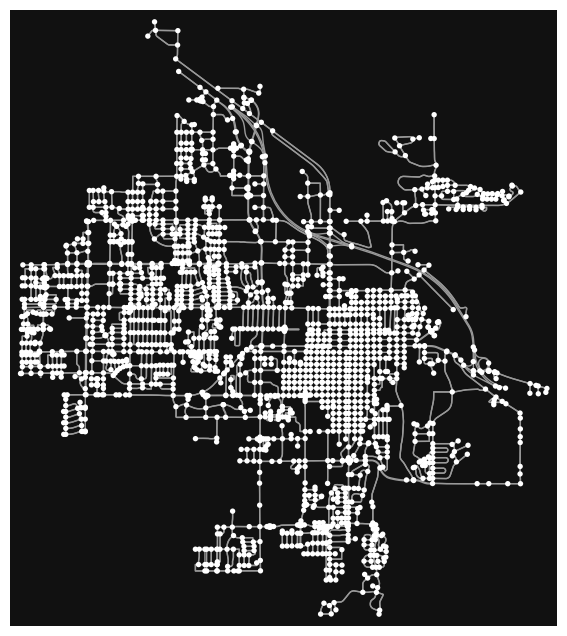

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [211]:
graph = osmnx.graph_from_place("Bozeman, Montana, USA", network_type="drive")
osmnx.plot_graph(graph)

3. As you have seen with the osmnx.graph_to_gdfs() method, it is possible to convert a graph into the constituent nodes and edges. Graphs have many other kinds of non-geographical representations. Many of these are provided in networkx methods that start with to_. How many representations of graphs are currently supported?

NetworkX supports a variety of conversions using methods that start with to_. As of NetworkX 3.x, these include:

    to_directed() / to_undirected()

    to_digraph()

    to_ego_graph()

    to_edgelist()

    to_numpy_array() / to_numpy_matrix()

    to_pandas_edgelist() / to_pandas_adjacency()

    to_dict_of_dicts() / to_dict_of_lists() / to_dict_of_numpy_array()

    to_sparse_array() / to_scipy_sparse_matrix()

…and potentially a few more niche ones. There are at least eight to ten such conversion methods available in current NetworkX versions.

4. Using networkx.to_edgelist(), what “extra” information does osmnx include when building the dataframe for edges?

In [212]:
edges = osmnx.graph_to_gdfs(graph, nodes=False)
edges.head()

osmid      highway maxspeed                 name  \
u        v        key                                                       
40648811 40840627 0    5556091  residential   25 mph   South Tracy Avenue   
         40769875 0    5556091  residential   25 mph   South Tracy Avenue   
         40648814 0    5532886  residential      NaN  West Curtiss Street   
         40989098 0    5552124  residential      NaN  East Curtiss Street   
40648814 40648831 0    5532886  residential      NaN  West Curtiss Street   

                       oneway reversed      length  \
u        v        key                                
40648811 40840627 0     False    False  110.103118   
         40769875 0     False     True  113.044050   
         40648814 0     False    False  121.901249   
         40989098 0     False     True  117.552545   
40648814 40648831 0     False    False  107.761024   

                                                                geometry  \
u        v        key                                                      
40648811 40840627 0    LINESTRING (-111.03719 45.67627, -111.03722 45...   
         40769875 0    LINESTRING (-111.03719 45.67627, -111.03717 45...   
         40648814 0    LINESTRING (-111.03719 45.67627, -111.0379 45....   
         40989098 0    LINESTRING (-111.03719 45.67627, -111.03642 45...   
40648814 40648831 0    LINESTRING (-111.03876 45.67627, -111.03947 45...   

                      lanes  ref bridge junction access  
u        v        key                                    
40648811 40840627 0     NaN  NaN    NaN      NaN    NaN  
         40769875 0     NaN  NaN    NaN      NaN    NaN  
         40648814 0     NaN  NaN    NaN      NaN    NaN  
         40989098 0     NaN  NaN    NaN      NaN    NaN  
40648814 40648831 0     NaN  NaN    NaN      NaN    NaN

From this we can see that osmnx includes rich metadata in the edge DataFrame beyond just the node IDs and connectivity. (osmid, length, highway, name, ...)

5. Instead of computing the average elevation for each neighborhood in San Diego, can you answer the following queries?

    - What neighborhood (or neighborhoods) have the the highest average elevation?

    - What neighborhood (or neighborhoods) have the highest point single point?
    
    - Can you find the neighborhood (or neighborhoods) with the largest elevation change?

                                                  NAME    mean_elev
145  Census Tract 209.04, San Diego County, California  1136.936829
81   Census Tract 209.02, San Diego County, California  1118.894502
382  Census Tract 209.03, San Diego County, California  1107.257213
146     Census Tract 211, San Diego County, California  1051.013203
547  Census Tract 212.02, San Diego County, California   967.164285


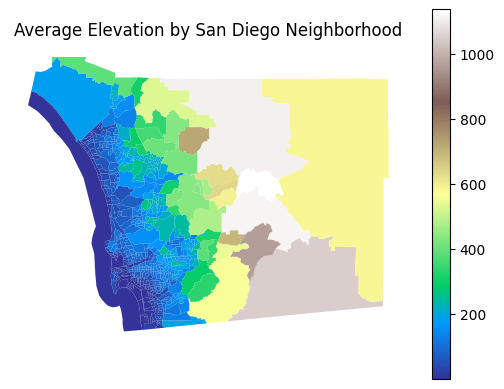

In [213]:
from rasterstats import zonal_stats

sd_tracts = sd_tracts.to_crs(dem.rio.crs)

dem_path = r"C:\Users\riley\Desktop\book\data\nasadem\nasadem_sd.tif"
dem.rio.to_raster(r"C:\Users\riley\Desktop\book\data\nasadem\nasadem_sd.tif")

stats = zonal_stats(
    sd_tracts,
    dem_path,
    stats=["mean"],
    geojson_out=False
)

# Add mean elevation to the tracts GeoDataFrame
sd_tracts["mean_elev"] = [s["mean"] for s in stats]

# Find the highest elevation tract
highest = sd_tracts.sort_values("mean_elev", ascending=False).head()

# Print or plot
print(highest[["NAME", "mean_elev"]])  # If NAME is the neighborhood name


sd_tracts.plot(column="mean_elev", cmap="terrain", legend=True)
plt.title("Average Elevation by San Diego Neighborhood")
plt.axis("off")
plt.show()


Highest elevation: 1983.00 meters
Located in tract:
                                                NAME        GEOID
0  Census Tract 209.03, San Diego County, California  06073020903


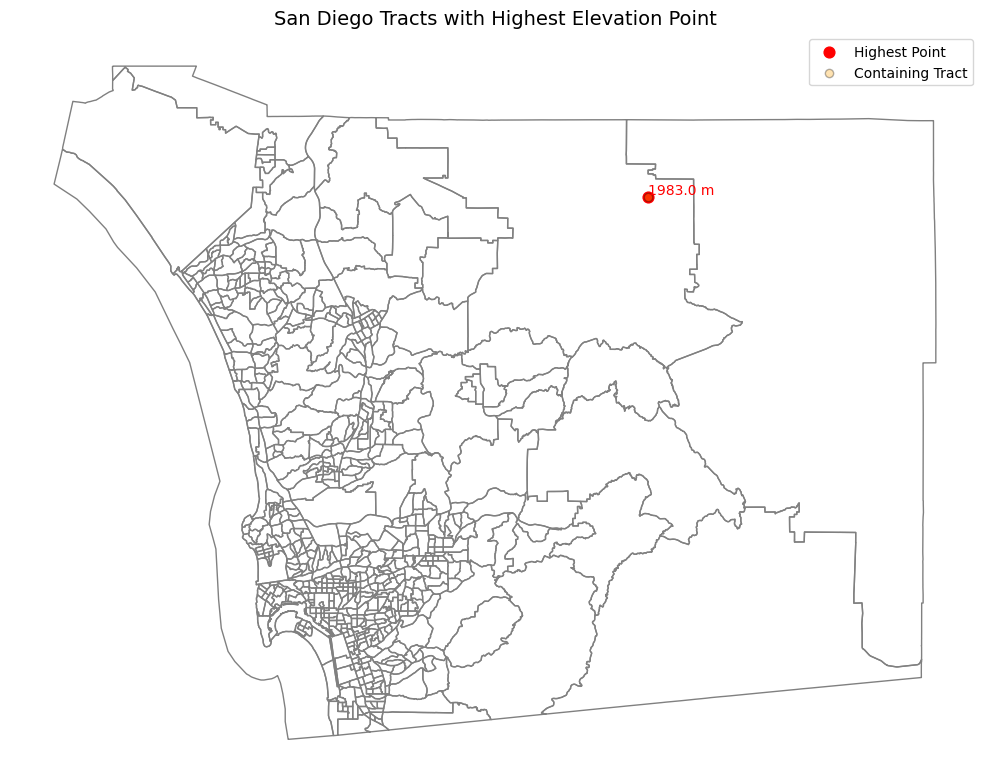

In [214]:
# What neighborhood (or neighborhoods) have the highest point single point?

import numpy as np
import rasterio
from shapely.geometry import Point

with rasterio.open(dem_path) as src:
    data = src.read(1, masked=True)
    transform = src.transform
    crs = src.crs

    row, col = np.unravel_index(np.argmax(data), data.shape)

    x, y = rasterio.transform.xy(transform, row, col)
    max_point = Point(x, y)
    max_elevation = data[row, col]

max_point_gdf = geopandas.GeoDataFrame(geometry=[max_point], crs=crs)

sd_tracts = sd_tracts.to_crs(crs)

containing_tract = geopandas.sjoin(max_point_gdf, sd_tracts, how="left", predicate="within")

print(f"Highest elevation: {max_elevation:.2f} meters")
print("Located in tract:")
print(containing_tract[["NAME", "GEOID"]])

max_point_gdf = geopandas.GeoDataFrame(geometry=[max_point], crs=sd_tracts.crs)
max_point_gdf["elevation"] = max_elevation

fig, ax = plt.subplots(figsize=(10, 10))
sd_tracts.plot(ax=ax, edgecolor='gray', facecolor='none')

max_point_gdf.plot(ax=ax, color='red', markersize=60, label='Highest Point')

x, y = max_point.x, max_point.y
plt.text(x, y, f'{max_elevation:.1f} m', fontsize=10, ha='left', va='bottom', color='red')

containing_tract.plot(ax=ax, facecolor='orange', alpha=0.3, edgecolor='black', label='Containing Tract')

plt.title("San Diego Tracts with Highest Elevation Point", fontsize=14)
plt.axis('off')
plt.legend()
plt.tight_layout()
plt.show()

                                                  NAME  elev_min  elev_max  \
627     Census Tract 210, San Diego County, California       4.0    1908.0   
81   Census Tract 209.02, San Diego County, California     205.0    1975.0   
146     Census Tract 211, San Diego County, California     167.0    1937.0   
382  Census Tract 209.03, San Diego County, California     235.0    1983.0   
546  Census Tract 191.01, San Diego County, California      70.0    1699.0   

     elev_range  
627      1904.0  
81       1770.0  
146      1770.0  
382      1748.0  
546      1629.0  


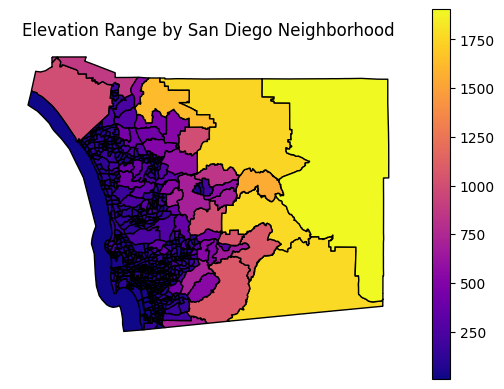

In [215]:
# Can you find the neighborhood (or neighborhoods) with the largest elevation change?

elev_stats = zonal_stats(
    sd_tracts,
    dem_path,
    stats=["min", "max"],
    geojson_out=False,
    nodata=dem.rio.nodata
)

# Add to GeoDataFrame
sd_tracts["elev_min"] = [s["min"] for s in elev_stats]
sd_tracts["elev_max"] = [s["max"] for s in elev_stats]
sd_tracts["elev_range"] = sd_tracts["elev_max"] - sd_tracts["elev_min"]

# Sort by elevation range
steepest = sd_tracts.sort_values("elev_range", ascending=False).head(5)

print(steepest[["NAME", "elev_min", "elev_max", "elev_range"]])

sd_tracts.plot(column="elev_range", cmap="plasma", legend=True, edgecolor="black")
plt.title("Elevation Range by San Diego Neighborhood")
plt.axis("off")
plt.show()
